<a href="https://colab.research.google.com/github/spacex56/firsst-mingi/blob/master/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EC%B5%9C%EC%A2%85%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 데이터 불러오기
import pandas as pd
import numpy as np
import random as rnd

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 머신러닝
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings(action='ignore')

# **보유한 데이터 확인해보기**

In [2]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

# 전처리를 한번에 진행하기 위해서
combine=[train_df,test_df]

In [3]:
# 변수 보기
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
# 데이터 미리 보기
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# 데이터 미리 보기
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
# 훈련 자료 정보
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# 테스트 자료 정보
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
# 훈련 자료 int, float 변수 통계치
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **특성 1 : 등급-Pclass**

In [10]:
#등급에 따른 생존율

pclass_train=train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
pclass_train

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


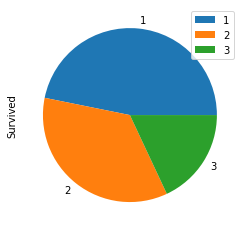

In [11]:
pclass_train.groupby(['Pclass']).sum().plot(kind='pie', y='Survived')

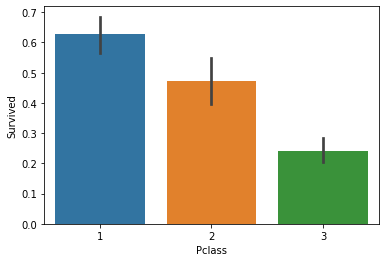

In [12]:
sns.barplot(x='Pclass', y='Survived', data=train_df)\
#죽은 사람 비율추가

# **특성 2 : 성별-Sex**

In [13]:
#성별에 따른 생존율

Sex_train=train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
Sex_train

,Sex,Survived
0,female,0.742038
1,male,0.188908


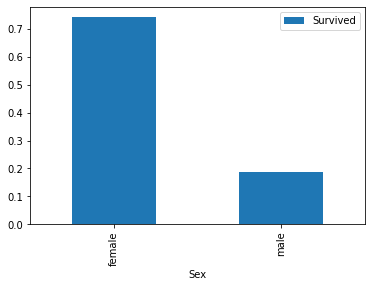

In [14]:
Sex_train.groupby(['Sex']).sum().plot(kind='bar', y='Survived')

#여자 1
#남자 0
#여자의 생존률이 높다

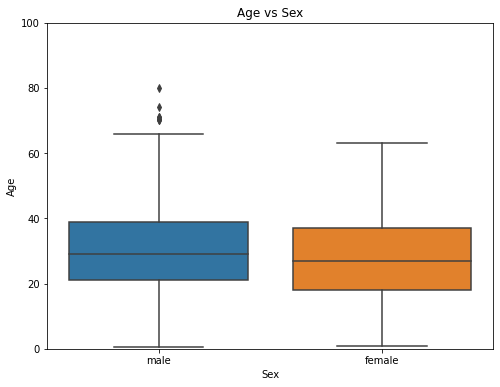

In [15]:
fig, ax=plt.subplots(1,figsize=(8,6))
sns.boxplot(x='Sex',y='Age', data=train_df)
ax.set_ylim(0,100)
plt.title("Age vs Sex")
plt.show()

# **특성 3 : Sibsp**

In [16]:
#동반자(형제&배우자)의 수에 따른 생존율

Sibsa_train=train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Sibsa_train
#==>> 동행이 적을 경우 생존율이 높음 

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


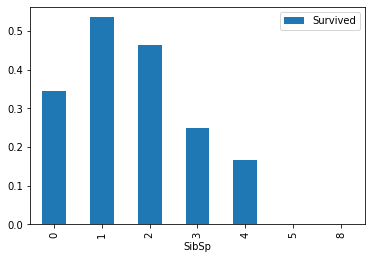

In [17]:
Sibsa_train.groupby(['SibSp']).sum().plot(kind='bar', y='Survived')

# **특성 4 : Parch**

In [18]:
#동반자(부모&자식)의 수에 따른 생존율

Parch_train=train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)
Parch_train
#==>> 동행이 적을 경우 생존율이 높음

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


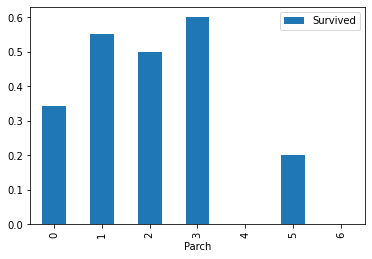

In [19]:
Parch_train.groupby(['Parch']).sum().plot(kind='bar', y='Survived')

# **특성 5 : age**

In [20]:
age_train=train_df[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)
age_train

,Age,Survived
0,0.42,1.0
9,5.00,1.0
79,63.00,1.0
68,53.00,1.0
1,0.67,1.0
...,...,...
37,28.50,0.0
49,36.50,0.0
46,34.50,0.0
26,20.50,0.0


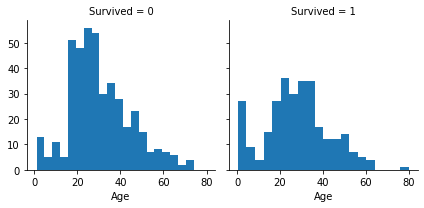

In [21]:
# 훈련 자료에서 생존 여부(Survived)에 따른 연령(Age) 분포

# 열(col)을 생존 여부로 나눔
g = sns.FacetGrid(train_df, col='Survived')
# 히스토그램으로 시각화, 연령의 분포를 확인, 히스토그램 bin을 20개로 설정
g.map(plt.hist, 'Age', bins=20)

#4세 이하의 유아 / 15 ~ 25세 승객들의 생존율이 높음

In [22]:
# 어느 나이가 살아남았는지 확인해보기
import plotly.express as px

for template in ["plotly"]:
    fig = px.scatter(train_df,
                     x="PassengerId", y="Age", color="Survived",
                     log_x=True, size_max=20,
                     template=template, title="Which Age Survived?")
    fig.show()

# **특성 6 : Embarked**


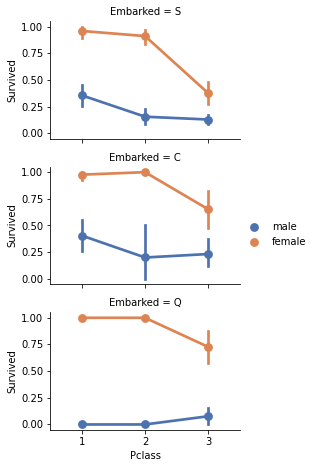

In [23]:
#훈련자료에서 승선지(Embarked)와 객실 등급(Pclass)에 따른 생존율(Survived)

grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)

# Pointplot으로 시각화, x: 객실 등급, y: 생존 여부, 색깔: 성별, x축 순서: [1, 2, 3], 색깔 순서: [남성, 여성]
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep', order = [1, 2, 3], hue_order = ["male", "female"])

grid.add_legend()

# **특성 7 : Fare**

In [24]:
fare_train=train_df[["Fare", "Survived"]].groupby(['Fare'], as_index=False).mean().sort_values(by='Survived', ascending=False)
fare_train

,Fare,Survived
247,512.3292,1.0
196,57.9792,1.0
89,13.8583,1.0
88,13.7917,1.0
86,13.4167,1.0
...,...,...
103,15.5500,0.0
180,47.1000,0.0
179,46.9000,0.0
178,42.4000,0.0


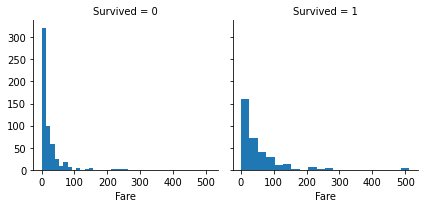

In [25]:
g = sns.FacetGrid(train_df, col='Survived')
# 히스토그램으로 시각화, 연령의 분포를 확인, 히스토그램 bin을 20개로 설정
g.map(plt.hist, 'Fare', bins=20)

# **1.전처리 : ticket,cabin 삭제**

In [26]:
#사용하지 않을 변수 제거

print("Before", train_df.shape, test_df.shape)

# 열(axis=1)제거
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]
print("After", train_df.shape, test_df.shape)

Before (891, 12) (418, 11)
After (891, 10) (418, 9)


# **2.전처리 : Sex 변수를 숫자형 변수로 바꿔줌**

In [27]:
#전처리 
#성별 변수를 숫자형 변수로 바꿔줌

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


# **특성 8 : Name -- > Title**

In [28]:
#Name의 Title을 뽑아서 새로운 특성제작

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.',expand=False)

train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,13.0000,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,30.0000,C,Mr


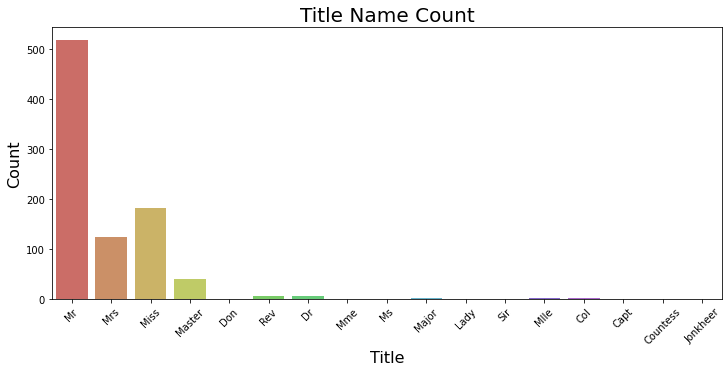

In [29]:
#막대그래프를 통해 타이틀별 수치 확인하기

import re


train_df['Title'] = train_df.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))


plt.figure(figsize=(12,5))


sns.countplot(x='Title', data=train_df, palette="hls")
plt.xlabel("Title", fontsize=16) #seting the xtitle and size
plt.ylabel("Count", fontsize=16) # Seting the ytitle and size
plt.title("Title Name Count", fontsize=20) 
plt.xticks(rotation=45)
plt.show()

In [30]:
#추출한 Title을 가진 사람이 몇 명이 존재하는지 성별과 함께 표현
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [31]:
# 'Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona' --> rare
# Mile -> Miss
# Ms --> Miss
# Mme --> Mrs

for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [32]:
#"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5 전처리작업

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,1


Title,Sex,Age의 관계

In [33]:
# Title,Sex,Age 3개의 관계를 효과적으로 확인하기

import plotly.express as px
fig = px.scatter_3d(train_df, x='Title', y='Sex', z='Age',
                    color='Age')
fig.show()

# **3.전처리 : 사용하지 않을 변수 제거 - Name,PassengerId**

In [34]:
# 사용하지 않을 변수 제거
# 총 8개 특성으로 예측모델을 만들자

train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

# **4.전처리 : Embarked 항구 S,C,Q,NaN 전처리**

In [35]:
train_df['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

Embarked Feature의 분포를 살펴보면 S가 대부분인데, 빠져있는 두 개의 데이터도 거기에 속할 확률이 크므로 S로 넣어주고 String Data로 변형

In [36]:
for dataset in combine:
  dataset['Embarked'] = dataset['Embarked'].fillna('S')
  # dataset['Embarked'] = dataset['Embarked'].astype(str)
  dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [37]:
train_df['Embarked'].value_counts(dropna=False)

#nan값이 s로 바뀐걸 볼 수 있다

0    646
1    168
2     77
Name: Embarked, dtype: int64

# **5.전처리 : Age 전처리**

In [38]:
test_df['Age'].fillna(test_df['Age'].dropna().median(), inplace=True)

In [39]:
train_df['Age'].fillna(train_df['Age'].dropna().median(), inplace=True)

In [40]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
# 임의로 5개 그룹을 지정
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [41]:
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age']= 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4 ;

train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]

# **6.전처리 : Fare 전처리**

In [42]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)

In [43]:
train_df['Fare'].head()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

In [44]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [45]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare']= 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare']= 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

In [46]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,0,0,1
1,1,1,1,2.0,1,0,3,1,3
2,1,3,1,1.0,0,0,1,0,2
3,1,1,1,2.0,1,0,3,0,3
4,0,3,0,2.0,0,0,1,0,1


In [47]:
combine

[     Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  Title
 0           0       3    0  1.0      1      0     0         0      1
 1           1       1    1  2.0      1      0     3         1      3
 2           1       3    1  1.0      0      0     1         0      2
 3           1       1    1  2.0      1      0     3         0      3
 4           0       3    0  2.0      0      0     1         0      1
 ..        ...     ...  ...  ...    ...    ...   ...       ...    ...
 886         0       2    0  1.0      0      0     1         0      5
 887         1       1    1  1.0      0      0     2         0      2
 888         0       3    1  1.0      1      2     2         0      2
 889         1       1    0  1.0      0      0     2         1      1
 890         0       3    0  1.0      0      0     0         2      1
 
 [891 rows x 9 columns],
      PassengerId  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  Title
 0            892       3    0  2.0      0      0     0     

# **데이터 준비**

In [48]:
# 목적 변수 제거
X_train = train_df.drop("Survived", axis=1)
#목적 변수 역할
Y_train = train_df["Survived"]
#예측 대상 데이터 셋
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [49]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    int64  
 7   Embarked     418 non-null    int64  
 8   Title        418 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 29.5 KB


In [50]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    int64  
 7   Embarked  891 non-null    int64  
 8   Title     891 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 62.8 KB


# **로지스틱 회귀로 예측해보기**

In [51]:
# Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, Y_train)
# Y_pred = lr.predict(X_test)

log_reg = round(lr.score(X_train, Y_train) * 100, 2)
log_reg

80.47

In [52]:
X_real_test=lr.predict(X_test)
X_real_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [53]:
gerder_df=pd.read_csv("gender_submission.csv")

In [54]:
gerder_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [55]:
#gerder_df의 survived 열을 내가 한걸로 대체


gerder_df['Survived'] = X_real_test
gerder_df

In [56]:
gerder_df.to_csv('logistic_dumy.csv',index=False)

# **랜덤 포레스트로 예측해보기**

In [57]:
# # Random Forest

# random_forest = RandomForestClassifier() #n_estimators=100
# random_forest.fit(X_train, Y_train)

# # Y_pred = random_forest.predict(X_test)
# # random_forest.score(X_train, Y_train)

# ran_for = round(random_forest.score(X_train, Y_train) * 100, 2)
# ran_for

In [58]:
# X_real_test2=random_forest.predict(X_test)
# X_real_test2

In [59]:
# gerder_df['Survived'] = X_real_test2
# gerder_df

In [60]:
# gerder_df.to_csv('random_forsest_7.21.csv',index=False)

In [61]:
#전처리 범주형 세분화
#모델 하이퍼파라메타 정교하게
#Xboost -> 80점대

# **XGBoost 로 예측하기**

In [62]:
import xgboost as xgb

In [63]:
# gbm = xgb.XGBClassifier(n_estimators= 2000, #learning_rate = 0.02,
#  max_depth= 4, 
#  min_child_weight= 2,
#  gamma=0.9,                        
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'binary:logistic',
#  nthread= -1,
#  scale_pos_weight=1).fit(X_train, Y_train)

In [64]:
# xgboost = round(gbm.score(X_train, Y_train) * 100, 2)
# xgboost

In [65]:
# X_real_test3=gbm.predict(X_test)
# X_real_test3

In [66]:
# gerder_df['Survived'] = X_real_test3
# gerder_df

In [67]:
# gerder_df.to_csv('gender_submission_xgb.csv',index=False)

# **K- 최근접 이웃**

In [68]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

85.75

In [70]:
knn_test=knn.predict(X_test)
knn_test

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [71]:
gerder_df['Survived'] = knn_test
gerder_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [72]:
gerder_df.to_csv('knn_7.21.csv',index=False)